# **Recommender Systems**

## Project Overview

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


They are used to predict the **rating** or **preference** that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. 
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

In this kernel we'll be building a baseline Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with. 

There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.


> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.


> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.


Let's load the data now.

In [133]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv(r"C:\Users\pc\Downloads\naya movie\credits.csv")
df2 = pd.read_csv(r"C:\Users\pc\Downloads\naya movie\movies_metadata.csv")

In [56]:
df1

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [57]:
df2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

Let's join the two dataset on the 'id' column


In [59]:
df1 = df1.head(5000)
df2 = df2.head(5000)


Just a peak at our data.

In [60]:
df1.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [61]:
df2.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [62]:
# Set 'id' as index in df1
df1_indexed = df1.set_index('id')

# Make sure df2's 'id' is cleaned and cast to int
df2['id'] = pd.to_numeric(df2['id'], errors='coerce')
df2 = df2.dropna(subset=['id'])
df2['id'] = df2['id'].astype(int)

# Set df2 index as 'id'
df2_indexed = df2.set_index('id')

# Join the two DataFrames on the index (which is 'id' now)
joined_df = df2_indexed.join(df1_indexed)

# Optional: reset index if you want 'id' as a column again
joined_df = joined_df.reset_index()


C:\Users\pc\AppData\Local\Temp\ipykernel_10336\3302398717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['id'] = pd.to_numeric(df2['id'], errors='coerce')


In [63]:
joined_df.columns

Index(['id', 'adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [64]:
df2=joined_df


In [65]:
df2.head()

,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,2,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44.0,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de..."
1,5,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de..."
2,6,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.4,79.0,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de..."
3,11,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778.0,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de..."
4,13,False,NaN,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,...,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The world will never be the same, once you've ...",Forrest Gump,False,8.2,8147.0,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de..."


# **Demographic Filtering** -
   Before getting started with this  -
* we need a metric to score or rate a movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
是一个 最低评分人数阈值，用于控制一部电影必须达到一定的评分人数才会参与排名
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [66]:
df2.columns

Index(['id', 'adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [67]:
C = df2['vote_average'].mean()
C

6.068732506997201

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [68]:
m = df2['vote_count'].quantile(0.9)
m

567.9000000000005

Now, we can filter out the movies that qualify for the chart 

In [69]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(501, 26)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, **weighted_rating()** and define a new feature **score**, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [70]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [71]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [72]:
# Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

# Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
129,The Shawshank Redemption,8358.0,8.5,8.345313
108,The Godfather,6024.0,8.5,8.290543
231,Fight Club,9678.0,8.3,8.176327
305,Pulp Fiction,8670.0,8.3,8.162833
4,Forrest Gump,8147.0,8.2,8.061118
183,Schindler's List,4436.0,8.3,8.046770
612,The Empire Strikes Back,5998.0,8.2,8.015662
280,Life Is Beautiful,3643.0,8.3,7.999082
110,The Godfather: Part II,3418.0,8.3,7.982095
36,Leon: The Professional,4293.0,8.2,7.951004


Hurray! We have made our first(though very basic) recommender.
Under the **Trending Now** tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

In [73]:
df2['popularity'] = pd.to_numeric(df2['popularity'], errors='coerce')

In [74]:
df2 = df2.dropna(subset=['popularity'])

In [75]:
pop = df2.sort_values('popularity', ascending=False)

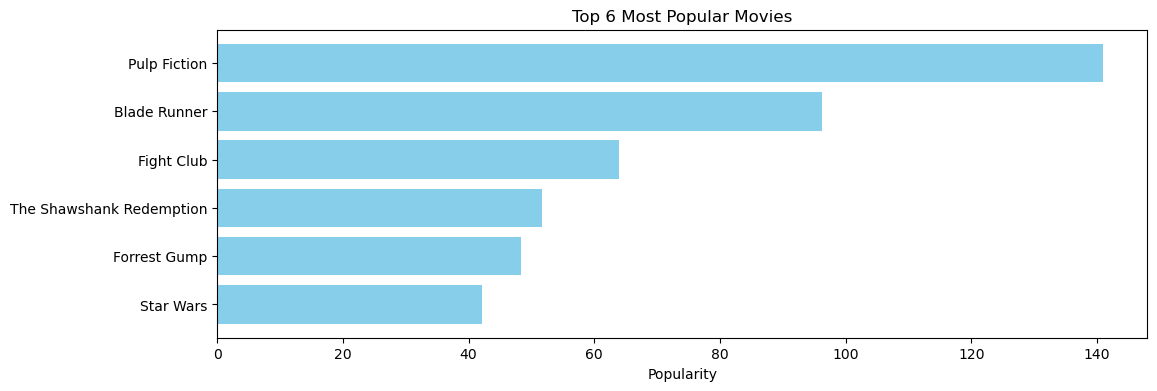

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.barh(pop['title'].head(6), pop['popularity'].head(6), align='center', color='skyblue')
plt.xlabel('Popularity')
plt.title('Top 6 Most Popular Movies')
plt.gca().invert_yaxis()  # So the highest bar is on top
plt.show()


Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering. 

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

In [77]:
df2['overview'].head(5)

0    Taisto Kasurinen is a Finnish coal miner whose...
1    It's Ted the Bellhop's first night on the job....
2    While racing to a boxing match, Frank, Mike, J...
3    Princess Leia is captured and held hostage by ...
4    A man with a low IQ has accomplished great thi...
Name: overview, dtype: object

In [78]:
#df1 = df1.head(5000)
#df2 = df2.head(5000)


For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

In [79]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(5002, 22304)

In [80]:
pd.DataFrame(tfidf_matrix.toarray(),
             columns=tfidf.get_feature_names_out()).head(10)

,000,007,05pm,10,100,101,103,10th,11,114,...,zords,zorin,zorro,zubin,zuckermann,zula,zulu,zyto,émigré,état
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
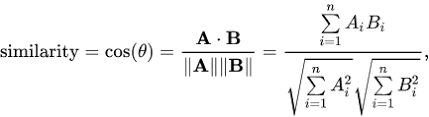

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [81]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [82]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices[:10]

title
Ariel                 0
Four Rooms            1
Judgment Night        2
Star Wars             3
Forrest Gump          4
American Beauty       5
Citizen Kane          6
Dancer in the Dark    7
The Fifth Element     8
Metropolis            9
dtype: int64

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [83]:
pd.DataFrame(cosine_sim).head(5)

,0,1,2,3,4,5,6,7,8,9,...,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001
0,1.000000,0.0,0.0,0.0,0.043216,0.039431,0.009050,0.027598,0.0,0.0000,...,0.000000,0.009884,0.00848,0.008750,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,...,0.000000,0.042630,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,1.0,0.0,0.000000,0.020472,0.000000,0.000000,0.0,0.0000,...,0.009865,0.000000,0.00000,0.000000,0.049167,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,...,0.009589,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.043216,0.0,0.0,0.0,1.000000,0.017641,0.007311,0.025142,0.0,0.0175,...,0.006210,0.000000,0.00000,0.007068,0.000000,0.0,0.0,0.017565,0.015921,0.0


In [93]:
# Function that takes in movie title as input and outputs most similar movies
#
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i[0] for i in sim_scores]
    
    print("Top 10 movies similar to:", title)
    for i, score in sim_scores:
        print(f"{df2['title'].iloc[i]} (score: {score:.4f})")
    
    return df2['title'].iloc[movie_indices]

In [94]:
print(df2['title'].sample(10))  # Get 10 random titles from what's available

2733                       Pot o' Gold
55                             Dracula
2872               Play It to the Bone
1849                 Chungking Express
3288                The Crossing Guard
3422                   The Golden Bowl
1680                      Mr. Nice Guy
2323                         SpaceCamp
4964    Peanuts – Die Bank zahlt alles
3308                           Rated X
Name: title, dtype: object


In [95]:
get_recommendations('Larger Than Life')

Top 10 movies similar to: Larger Than Life
Three Wishes (score: 0.1843)
The Designated Mourner (score: 0.1455)
The Family Man (score: 0.1405)
Juno and the Paycock (score: 0.1297)
Lightning Jack (score: 0.1279)
Patriot Games (score: 0.1194)
Fathers' Day (score: 0.1189)
Summer Rental (score: 0.1185)
Glory Daze (score: 0.1180)
Sommersby (score: 0.1151)


4195              Three Wishes
4804    The Designated Mourner
961             The Family Man
4183      Juno and the Paycock
2959            Lightning Jack
1423             Patriot Games
2208              Fathers' Day
2788             Summer Rental
3216                Glory Daze
473                  Sommersby
Name: title, dtype: object

In [97]:
get_recommendations('The Avengers')

Top 10 movies similar to: The Avengers
Monty Python and the Holy Grail (score: 0.1785)
The Journey of August King (score: 0.1232)
An Ideal Husband (score: 0.1177)
Mulholland Falls (score: 0.1097)
The Big Easy (score: 0.1073)
A Man for All Seasons (score: 0.1068)
Miss Julie (score: 0.1034)
Witness for the Prosecution (score: 0.0966)
The Lost World (score: 0.0930)
A Knight's Tale (score: 0.0899)


339     Monty Python and the Holy Grail
4417         The Journey of August King
3046                   An Ideal Husband
1802                   Mulholland Falls
1820                       The Big Easy
409               A Man for All Seasons
4813                         Miss Julie
3779        Witness for the Prosecution
785                      The Lost World
1299                    A Knight's Tale
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

# **Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.



### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

Now talking about latent factor you might be wondering what is it ?It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

Now enough said , let's see how to implement this.
Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [110]:
!pip install scikit-surprise

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pc\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       h56e8100_0         155 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    h5py-3.12.1                |  py311h3b2c811_0         1.2 MB
    openssl-3.4.1              |       ha4e3fda_0         8.1 MB  conda-forge
    python_abi-3.11            |          2_cp311           5 KB  conda-forge
    scikit-surprise-1.1.4      |  py311h814a670_1         543 KB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_1         547 KB  conda-forge
    vc14_runtime-14.42.34438   |      hfd919c2_26         733 KB  conda-forge
    vs2015_runtime-14.42.34438 |      h7142326_26


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::_anaconda_depends==2023.09=py311_mkl_1


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.3.1




  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [155 lines of output]
  C:\Users\pc\AppData\Local\Temp\pip-build-env-5xqwau6m\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
  !!
  
          ********************************************************************************
          Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
  
          By 2026-Feb-18, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    corresp(dist, value, root_dir)
  C:\Users\pc\AppData\Local\Temp\pip-build-env-5

In [120]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv(r"C:\Users\pc\Downloads\naya movie\ratings_small.csv")
print(ratings)


        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]


In [122]:
ratings = ratings.head(5000)
print(ratings)

      userId  movieId  rating   timestamp
0          1       31     2.5  1260759144
1          1     1029     3.0  1260759179
2          1     1061     3.0  1260759182
3          1     1129     2.0  1260759185
4          1     1172     4.0  1260759205
...      ...      ...     ...         ...
4995      28     1094     4.0   938942614
4996      28     1203     5.0   938943524
4997      28     1206     4.0   938944744
4998      28     1219     5.0   938943150
4999      28     1225     5.0   938944457

[5000 rows x 4 columns]


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [123]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [127]:
svd = SVD()
cross_validate(svd, data, cv=5, measures=['RMSE', 'MAE'])

{'test_rmse': array([1.08029283, 1.04952561, 1.03819851, 1.08304274, 1.08080409]),
 'test_mae': array([0.86865302, 0.85101015, 0.82945985, 0.87850338, 0.86315347]),
 'fit_time': (0.06083512306213379,
  0.05082964897155762,
  0.0465850830078125,
  0.04587888717651367,
  0.04587721824645996),
 'test_time': (0.006016969680786133,
  0.007011890411376953,
  0.005983829498291016,
  0.007978200912475586,
  0.008013725280761719)}

We get a mean Root Mean Square Error (RMSE) of ~1.07, which is acceptable for many recommender systems. We can now proceed to train our SVD model on the full dataset and generate predictions

In [128]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 1  and check the ratings she/he has given.

In [129]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [130]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.686401594825539, details={'was_impossible': False})

For the movie with ID 302, we get an estimated rating of 2.69 (rounded). One interesting feature of this recommender system is that it doesn't care what the movie is about—it relies entirely on numerical patterns in user ratings. It uses only userId, movieId, and rating to predict how a user might rate a movie they haven't seen, based on how similar users rated it.

In [132]:
def get_user_recommendations(user_id, top_n=10):
    # Get all movies the user hasn't rated yet
    user_ratings = ratings[ratings['userId'] == user_id]
    user_seen_movies = user_ratings['movieId'].tolist()

    # Find all movies not seen by this user
    all_movieIds = ratings['movieId'].unique()
    movies_to_predict = [
        movie_id for movie_id in all_movieIds if movie_id not in user_seen_movies]

    # Predict ratings for all unseen movies
    predictions = []
    for movie_id in movies_to_predict:
        prediction = svd.predict(user_id, movie_id)
        predictions.append((movie_id, prediction.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_predictions = predictions[:top_n]

    # Convert movieIDs to titles using our dataset
    # Need to map the movieId from ratings to id from df2 first
    # Create a mapping of movieIds from ratings to titles in our main dataframe
    # This might not be perfect and requires some matching

    # Get the top recommended movies with their predicted ratings
    recommended_movies = []
    for movie_id, pred_rating in top_predictions:
        # Try to find this movie in our df2 dataset
        # This assumes movie IDs are the same between datasets (adjust if not)
        recommended_movies.append({
            'movieId': movie_id,
            'predicted_rating': pred_rating

        })

    # Convert to DataFrame
    recommendations_df = pd.DataFrame(recommended_movies)

    # Display recommendations with nicer formatting
    print(f"Top {top_n} movie recommendations for user {user_id}:")
    print(f"MovieID | Predicted Rating")
    print("-" * 30)
    for _, row in recommendations_df.iterrows():
        print(
            f"{int(row['movieId'])}  |  {row['predicted_rating']:.2f}")

    return recommendations_df


# Example: Get recommendations for user 1
user_recommendations = get_user_recommendations(1)

Top 10 movie recommendations for user 1:
MovieID | Predicted Rating
------------------------------
778  |  3.35
111  |  3.33
750  |  3.29
50  |  3.29
527  |  3.29
1225  |  3.25
1041  |  3.22
923  |  3.22
306  |  3.21
4226  |  3.20


## **Conclusion** 
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary.
This model was very baseline and only provides a fundamental framework to start with.

